In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc 
from scipy.signal import upfirdn 
from numpy import sum, sqrt
from numpy.random import standard_normal
def bpsk_mod(ak,L):
    s=upfirdn(h=[1]*L, x=2*ak-1, up=L)
    t=np.arange(start=0, stop=len(ak) *L)# Discrete Time index 
    return(s, t)
def bpsk_demod(r,L):
    x=np.real(r)
    x=np.convolve(x, np.ones(L))# integrate for Tb duration L samples 
    x=x[L-1::L]
    ak_hat=(x>0).transpose()
    return ak_hat

N=1000000# Number of symbols to transmit
EbN0dB = np.arange(start=-4, stop=11, step =2) # Eb/NO range in dB for simulation
L=16# oversampling factor, L-Tb/Ts (Tb-bit period, Ts-sampling period) 
#if a carrier is used, use L = FS/Fc, where FS >> 2xFC2)
Fc=800 #carrier frequency
Fs=L*Fc #sampling frequency
BER= np.zeros(len(EbN0dB)) # for BER values for each Eb/NO
ak=np.random.randint(2, size=N) # uniform random symbols from 0's and 1's 
(s_bb,t)= bpsk_mod(ak,L) # 8PSK modulation(waveform)-baseband 
s=s_bb*np.cos(2*np.pi*Fc*t/Fs) # with carrier
for i,EbN0 in enumerate(EbN0dB):
    gamma=10**(EbN0/10)
    P=L*sum(abs(s)**2)/len(s)
    N0=P/gamma
    n= sqrt(N0/2)*standard_normal(s.shape)
    r=s+n
    r_bb = r*np.cos(2*np.pi*Fc*t/Fs) # recovered baseband signal 
    ak_hat=bpsk_demod(r_bb,L) # baseband correlation demodulator 
    BER[i] = np.sum(ak !=ak_hat)/N # Bit Error Rate Computation

theoreticalBER=0.5*erfc(np.sqrt(10** (EbN0dB/10))) # Theoretical bit error rate Plots---

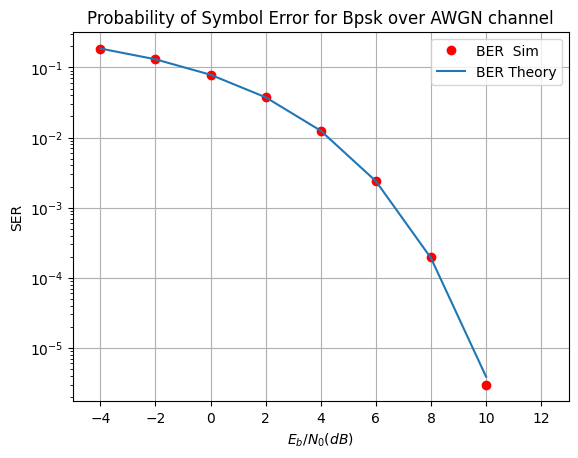

In [21]:
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dB, BER, color='r',marker='o', linestyle='', label='BER  Sim') 
ax.semilogy(EbN0dB, theoreticalBER, marker='', linestyle='-',label='BER Theory') 
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('SER')
ax.set_title('Probability of Symbol Error for Bpsk over AWGN channel') 
ax.set_xlim(-5,13); ax.grid(True)
ax.legend();plt.show()